In [87]:
import numpy as np
import tensorflow as tf
from tensorflow.python.data import Dataset
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from sklearn.metrics import mean_squared_error

In [4]:
df=pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [6]:
x=df.drop('median_house_value',axis=1)
x['rooms_per_person']=df['total_rooms']/df['population']


In [7]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,5.529064
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,6.775908
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,2.162162
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,2.914563
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,2.330128


In [8]:
y=df['median_house_value']/1000
y.head()

0    66.9
1    80.1
2    85.7
3    73.4
4    65.5
Name: median_house_value, dtype: float64

In [9]:
x_train=x.head(12000)
x_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000
mean,-118.470274,34.614578,27.468333,2655.682333,547.057167,1476.007000,505.38425,3.795047,1.940185
std,1.243589,1.625970,12.061790,2258.147574,434.314754,1174.280904,391.71534,1.851925,1.327142
min,-121.390000,32.540000,1.000000,2.000000,2.000000,3.000000,2.00000,0.499900,0.018065
25%,-118.940000,33.820000,17.000000,1451.750000,299.000000,815.000000,283.00000,2.517200,1.420007
50%,-118.210000,34.050000,28.000000,2113.500000,438.000000,1207.000000,411.00000,3.462250,1.880875
75%,-117.790000,34.440000,36.000000,3146.000000,653.000000,1777.000000,606.00000,4.644625,2.258830
max,-114.310000,41.820000,52.000000,37937.000000,5471.000000,35682.000000,5189.00000,15.000100,55.222222


In [11]:
y_train=y.head(12000)
y_train.describe()

count    12000.000000
mean       198.037593
std        111.857499
min         14.999000
25%        117.100000
50%        170.500000
75%        244.400000
max        500.001000
Name: median_house_value, dtype: float64

In [14]:
x_valid=x.head(5000)
x_valid.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-117.482700,33.631748,24.260800,2981.247000,585.633000,1593.251200,537.864400,4.076607,1.966528
std,0.552238,0.555978,11.252311,2601.045301,475.817895,1347.698271,421.170594,1.818433,0.836230
min,-118.110000,32.540000,2.000000,2.000000,2.000000,6.000000,2.000000,0.499900,0.119216
25%,-117.930000,33.150000,16.000000,1590.500000,316.000000,861.000000,300.000000,2.828100,1.504254
50%,-117.625000,33.790000,24.000000,2329.000000,466.000000,1279.500000,435.000000,3.760400,1.906408
75%,-117.140000,34.040000,33.000000,3484.250000,686.000000,1894.000000,636.000000,5.008175,2.278550
max,-114.310000,36.640000,52.000000,37937.000000,5471.000000,35682.000000,5189.000000,15.000100,15.404531


In [15]:
y_valid=y.head(5000)
y_valid.describe()

count    5000.000000
mean      197.422350
std       100.678341
min        14.999000
25%       129.200000
50%       174.450000
75%       239.900000
max       500.001000
Name: median_house_value, dtype: float64

Lets move to eda part

Plotting the graph between long-lat and the media price value

[]

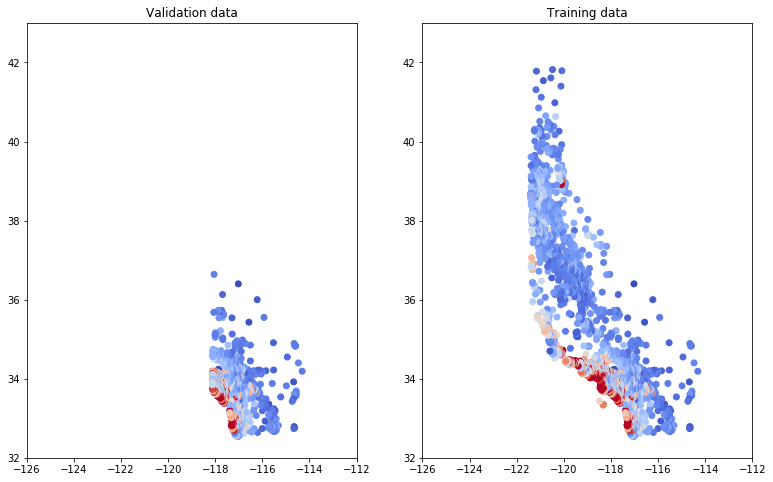

In [27]:
plt.figure(figsize=(13,8))
ax=plt.subplot(1,2,1)
ax.set_title("Validation data")
plt.scatter(x_valid['longitude'],x_valid['latitude'],cmap="coolwarm",c=y_valid/y_valid.max())
ax.set_ylim([32, 43])
ax.set_xlim([-126, -112])
ax=plt.subplot(1,2,2)
ax.set_title("Training data")
plt.scatter(x_train['longitude'],x_train['latitude'],cmap="coolwarm",c=y_train/y_train.max())
ax.set_ylim([32, 43])

ax.set_xlim([-126, -112])
plt.plot()

The validation data does not seems got.. The reason is that the data is arranged in some sorted manner so validation data is biased. So lets suffel the data and randomize it

In [29]:
df=df.reindex(np.random.permutation(df.index))

In [32]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
11027,-120.95,36.47,52.0,1691.0,301.0,618.0,239.0,3.2292,225000.0
12421,-121.58,39.83,16.0,4591.0,904.0,1904.0,812.0,2.2419,93200.0
13077,-121.87,37.30,14.0,360.0,124.0,134.0,84.0,2.7411,112500.0
1349,-117.17,34.51,15.0,5151.0,942.0,2896.0,897.0,3.4875,90800.0
16813,-123.20,39.13,26.0,1474.0,417.0,1065.0,401.0,1.3750,84400.0


Again make our training and validation data

[]

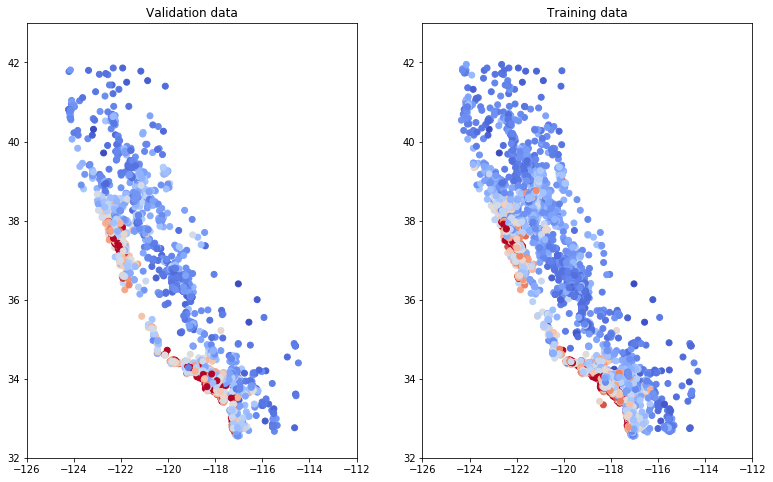

In [33]:
x=df.drop('median_house_value',axis=1)
x['rooms_per_person']=df['total_rooms']/df['population']
y=df['median_house_value']/1000
x_train=x.head(12000)
y_train=y.head(12000)
x_valid=x.head(5000)
y_valid=y.head(5000)
plt.figure(figsize=(13,8))
ax=plt.subplot(1,2,1)
ax.set_title("Validation data")
plt.scatter(x_valid['longitude'],x_valid['latitude'],cmap="coolwarm",c=y_valid/y_valid.max())
ax.set_ylim([32, 43])
ax.set_xlim([-126, -112])
ax=plt.subplot(1,2,2)
ax.set_title("Training data")
plt.scatter(x_train['longitude'],x_train['latitude'],cmap="coolwarm",c=y_train/y_train.max())
ax.set_ylim([32, 43])

ax.set_xlim([-126, -112])
plt.plot()

In [34]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of multiple features.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [35]:
my_input_fn(x_train,y_train)

({'longitude': <tf.Tensor 'IteratorGetNext:3' shape=(?,) dtype=float64>,
  'latitude': <tf.Tensor 'IteratorGetNext:2' shape=(?,) dtype=float64>,
  'housing_median_age': <tf.Tensor 'IteratorGetNext:1' shape=(?,) dtype=float64>,
  'total_rooms': <tf.Tensor 'IteratorGetNext:8' shape=(?,) dtype=float64>,
  'total_bedrooms': <tf.Tensor 'IteratorGetNext:7' shape=(?,) dtype=float64>,
  'population': <tf.Tensor 'IteratorGetNext:5' shape=(?,) dtype=float64>,
  'households': <tf.Tensor 'IteratorGetNext:0' shape=(?,) dtype=float64>,
  'median_income': <tf.Tensor 'IteratorGetNext:4' shape=(?,) dtype=float64>,
  'rooms_per_person': <tf.Tensor 'IteratorGetNext:6' shape=(?,) dtype=float64>},
 <tf.Tensor 'IteratorGetNext:9' shape=(?,) dtype=float64>)

Lets make input functions of out training model

To construct the feature columns of the tensorflow model, we need this function

In [36]:
def construct_feature_columns(input_features):
  """Construct the TensorFlow Feature Columns.

  Args:
    input_features: The names of the numerical input features to use.
  Returns:
    A set of feature columns
  """ 
  return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])

In [37]:
construct_feature_columns(x_train)

{_NumericColumn(key='households', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='housing_median_age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='latitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='longitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='median_income', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='population', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='rooms_per_person', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='total_bedrooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='total_rooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)}

In [72]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.003)
optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer, 5.0)
model=tf.estimator.LinearRegressor(feature_columns=construct_feature_columns(x_train),optimizer=optimizer)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\abhishek\\AppData\\Local\\Temp\\tmpfnrap233', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018000F7AEF0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [48]:
training_input=lambda :my_input_fn(x_train,y_train)

In [49]:
training_input

<function __main__.<lambda>()>

In [75]:
prediction_input=lambda :my_input_fn(x_valid,y_valid,num_epochs=1,shuffle=False)

Training of the model

In [76]:
model.train(input_fn=training_input,steps=100)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\abhishek\AppData\Local\Temp\tmpfnrap233\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 201 into C:\Users\abhishek\AppData\Local\Temp\tmpfnrap233\model.ckpt.
INFO:tensorflow:loss = 7837.142, step = 201
INFO:tensorflow:Saving checkpoints for 300 into C:\Users\abhishek\AppData\Local\Temp\tmpfnrap233\model.ckpt.
INFO:tensorflow:Loss for final step: 2417.6333.


Predict the values for validation data

In [84]:
pred=model.predict(input_fn=prediction_input)

In [85]:
pred=np.array([item['predictions'][0] for item in pred])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\abhishek\AppData\Local\Temp\tmpfnrap233\model.ckpt-300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [89]:
valid_error=mean_squared_error(pred,y_valid)

In [91]:
np.sqrt(valid_error)

213.57743711130453

We can tune the hyperparameters like learning rate and batch size to vary the rmse.

In [93]:
def my_model(lr,x_train,y_train,x_valid,y_valid,batch_size,step):
    period=10
    steps=step/period
    rmse=[]
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
    optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer, 5.0)
    model=tf.estimator.LinearRegressor(feature_columns=construct_feature_columns(x_train),optimizer=optimizer)
    training_input=lambda :my_input_fn(x_train,y_train,batch_size=batch_size)
    prediction_input=lambda :my_input_fn(x_valid,y_valid,num_epochs=1,shuffle=False)
    for i in range(0,period):
        model.train(input_fn=training_input,steps=steps)
        pred=model.predict(input_fn=prediction_input)
        pred=np.array([item['predictions'][0] for item in pred])
        valid_error=mean_squared_error(pred,y_valid)
        print(" period %02d : %0.2f" % (i, valid_error))
        rmse.append(valid_error)
    print("Model training finished")
    plt.ylabel("RMSE")
    plt.xlabel("Periods")
    plt.title("Root Mean Squared Error vs. Periods")
    plt.tight_layout()
    plt.plot(rmse, label="validation")
    plt.legend()

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\abhishek\\AppData\\Local\\Temp\\tmpzt40ug6r', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018001012D68>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\abhish

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\abhishek\AppData\Local\Temp\tmpzt40ug6r\model.ckpt-400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
 period 07 : 28687.76
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\abhishek\AppData\Local\Temp\tmpzt40ug6r\model.ckpt-400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 401 into C:\Users\abhishek\AppData\Local\Temp\tmpzt40ug6r\model.ckpt.
INFO:tensorflow:loss = 170079.52, step = 401
INFO:tensorflow:Saving checkpoints for 450 into C:\Users\abhishek\AppData\Local\Temp\tmpzt40ug6r\model.ckpt.
INFO:tensorflow:Loss for final step: 92405.78.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calli

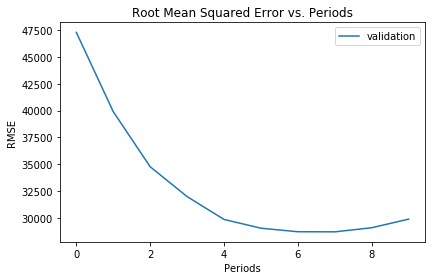

In [95]:
my_model(0.00003,x_train,y_train,x_valid,y_valid,5,500)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\abhishek\\AppData\\Local\\Temp\\tmpafcj9jmc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001800203B898>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\abhish

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\abhishek\AppData\Local\Temp\tmpafcj9jmc\model.ckpt-400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
 period 07 : 27825.40
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\abhishek\AppData\Local\Temp\tmpafcj9jmc\model.ckpt-400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 401 into C:\Users\abhishek\AppData\Local\Temp\tmpafcj9jmc\model.ckpt.
INFO:tensorflow:loss = 158802.19, step = 401
INFO:tensorflow:Saving checkpoints for 450 into C:\Users\abhishek\AppData\Local\Temp\tmpafcj9jmc\model.ckpt.
INFO:tensorflow:Loss for final step: 190227.11.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done call

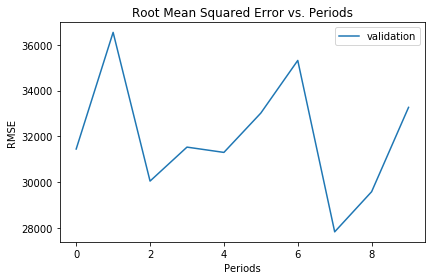

In [96]:
my_model(0.001,x_train,y_train,x_valid,y_valid,5,500)